## Machine Learning - Regression - Course Project

The course project will review John Hollinger's NBA Advanced Statistics, namely Player Efficiency Rating (PER)

PER is considered an advanced statistic that takes into account all of a players positive/negative contributions to a game and returns them in a single, weighted measure

****Data dictionary****:

Each observation represents an individual player's Hollinger stats for that season. Columns and their appropriate definition follows as detailed by ESPN.com are as follows:

rank that player's PER rank for that given season

ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

orr Offensive rebound rate

drr Defensive rebound rate

rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

per Player Efficiency Rating is the overall rating of a player's per-minute statistical production. The league average is 15.00 every season.

va Value Added - the estimated number of points a player adds to a teamâ€™s season total above what a 'replacement player' (for instance, the 12th man on the roster) would produce. Value Added = ([Minutes * (PER - PRL)] / 67). PRL (Position Replacement Level) = 11.5 for power forwards, 11.0 for point guards, 10.6 for centers, 10.5 for shooting guards and small forwards

ewa Estimated Wins Added - Value Added divided by 30, giving the estimated number of wins a player adds to a team's season total above what a 'replacement player' would produce.

PER - sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance

### Objective

The objective of this assignment is to use advanced statistics, from John hollinger's advanced NBA  Statistics, in an attempt to both understand what affects a players PER, as well as to provide predictions of PER based on said statistics. The PER formula is an unknown - it is not shared in any literature, making this exercise a worthwhile one for somebody who seeks to understand the number better. 

To determine this, the following input statistics will be used from Hollinger's NBA advanced statistics:

1. ts% True Shooting Percentage - what a player's shooting percentage would be if we accounted for free throws and 3-pointers. True Shooting Percentage = Total points / [(FGA + (0.44 x FTA)]

2. ast Assist Ratio - the percentage of a player's possessions that ends in an assist. Assist Ratio = (Assists x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

3. to Turnover Ratio - the percentage of a player's possessions that end in a turnover. Turnover Ratio = (Turnover x 100) divided by [(FGA + (FTA x 0.44) + Assists + Turnovers]

4. usg Usage Rate - the number of possessions a player uses per 40 minutes. Usage Rate = {[FGA + (FT Att. x 0.44) + (Ast x 0.33) + TO] x 40 x League Pace} divided by (Minutes x Team Pace)

5. orr Offensive rebound rate

6. drr Defensive rebound rate

7. rebr Rebound Rate - the percentage of missed shots that a player rebounds. Rebound Rate = (100 x (Rebounds x Team Minutes)) divided by [Player Minutes x (Team Rebounds + Opponent Rebounds)]

8. Minutes per game (mpg): the amount a player plays - affects usage and efficiency

### Data Loading & Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits as mp
import mpl_toolkits
import seaborn as sns
sns.set()

In [2]:
# read in the data:
# data downloaded and saved as a csv from Kaggle datasets
data = pd.read_csv('hollingersStats.csv')
data.head()

,Unnamed: 0,rank,gp,mpg,ts%,ast,to,usg,orr,drr,rebr,per,va,ewa,player,team,season
0,1,1,75,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01,452.0,15.1,Tracy McGrady,ORL,2002-03
1,2,2,67,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43,356.2,11.9,Shaquille O'Neal,LAL,2002-03
2,3,3,82,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07,420.6,14.0,Kobe Bryant,LAL,2002-03
3,4,4,82,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46,370.8,12.4,Kevin Garnett,MIN,2002-03
4,5,5,81,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46,355.0,11.8,Tim Duncan,SA,2002-03


In [3]:
# no need for columns Unnamed, rank, gp, va, ewa, player, team, season
# will evaluate all data for multiple seasons from 2005-03 to 2017-18
per_data = data[['mpg', 'ts%', 'ast', 'to', 'usg', 'orr', 'drr', 'rebr', 'per']]
per_data.head()

,mpg,ts%,ast,to,usg,orr,drr,rebr,per
0,39.4,0.564,15.0,7.1,32.6,5.0,14.6,9.5,31.01
1,37.8,0.602,10.7,10.1,27.8,11.0,21.6,16.5,29.43
2,41.5,0.550,16.0,9.6,31.1,3.0,15.3,9.3,27.07
3,40.5,0.553,20.4,9.4,25.0,9.0,28.5,18.8,26.46
4,39.3,0.564,14.1,11.1,25.7,10.0,27.3,19.0,26.46


In [4]:
# get the shape of the data and data types
print('Number of Rows:' , per_data.shape[0])
print('Number of Columns', per_data.shape[1])
data.info()

Number of Rows: 5404
Number of Columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 17 columns):
Unnamed: 0    5404 non-null int64
rank          5404 non-null int64
gp            5404 non-null int64
mpg           5404 non-null float64
ts%           5404 non-null float64
ast           5404 non-null float64
to            5404 non-null float64
usg           5404 non-null float64
orr           5404 non-null float64
drr           5404 non-null float64
rebr          5404 non-null float64
per           5404 non-null float64
va            5404 non-null float64
ewa           5404 non-null float64
player        5404 non-null object
team          5404 non-null object
season        5404 non-null object
dtypes: float64(11), int64(3), object(3)
memory usage: 717.8+ KB


Note that for all entries (5404 rows/records) there are non-null values

In [5]:
# get the unique seasons the dataset covers
print(len(data['season'].unique().tolist()), 'seasons')

16 seasons


In [6]:
# check data for null/missing values: already checked above, but again for completeness
check_na = per_data.isnull()

# get a count of null (True) vs non-null (False)
print('Minutes/Game: ', check_na['mpg'].value_counts())
print('True Shooting %: ', check_na['ts%'].value_counts())
print('Assists: ', check_na['ast'].value_counts())
print('Turnovers: ', check_na['to'].value_counts())
print('Usage: ', check_na['usg'].value_counts())
print('Offensive Rebounding: ', check_na['orr'].value_counts())
print('Defensive Rebounding: ', check_na['drr'].value_counts())
print('Rebound Rate: ', check_na['rebr'].value_counts())
print('PER: ', check_na['per'].value_counts())

Minutes/Game:  False    5404
Name: mpg, dtype: int64
True Shooting %:  False    5404
Name: ts%, dtype: int64
Assists:  False    5404
Name: ast, dtype: int64
Turnovers:  False    5404
Name: to, dtype: int64
Usage:  False    5404
Name: usg, dtype: int64
Offensive Rebounding:  False    5404
Name: orr, dtype: int64
Defensive Rebounding:  False    5404
Name: drr, dtype: int64
Rebound Rate:  False    5404
Name: rebr, dtype: int64
PER:  False    5404
Name: per, dtype: int64


The data shows all 5404 rows are populated for each feature of interest

#### Exploratory Analysis

Will check each measure at a time vs PER on combined graphs to check for relationship to PER

In [7]:
# first, will gget an idea of the data range using the describe feature
per_data.describe()

,mpg,ts%,ast,to,usg,orr,drr,rebr,per
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,24.545448,0.531777,15.992746,11.131625,18.066155,5.375093,14.653349,10.013583,14.281956
std,7.954939,0.048009,8.033157,2.880580,4.733323,3.851429,5.817942,4.535166,4.252705
min,7.000000,0.338000,1.200000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.900000,0.502000,10.000000,9.200000,14.700000,2.000000,10.000000,6.200000,11.320000
50%,24.400000,0.532000,14.100000,10.900000,17.700000,4.000000,13.600000,8.950000,13.920000
75%,31.200000,0.563000,20.600000,12.700000,21.100000,8.100000,18.600000,13.300000,16.630000
max,43.100000,0.725000,48.700000,29.600000,42.500000,22.000000,38.000000,26.700000,31.760000


Note the Mean/Median of the PER is 14.28/13.92. this is reasonably close to the 'average' of PER (as defined by Hollinger) of 15.0

In [8]:
# check the histogram distributions of each input to see how the input data will be distributed
y_col = 'per'

X = per_data.drop(y_col, axis = 1)
y = per_data[y_col]

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:332: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


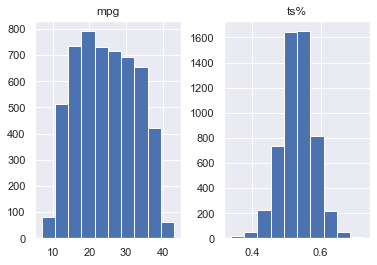

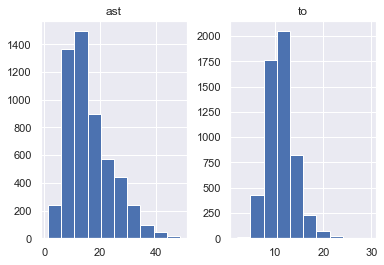

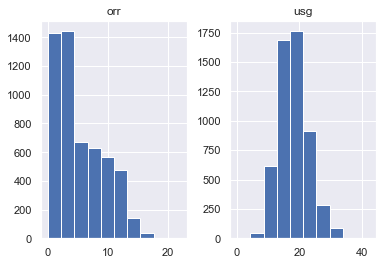

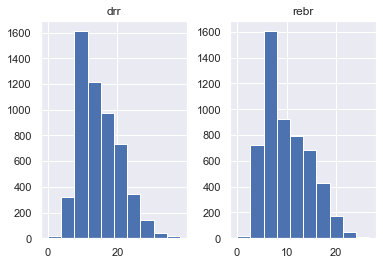

In [9]:
# generate histograms for all of the X data
mpgts = X.hist(column = ['mpg', 'ts%'])
astto = X.hist(column = ['ast', 'to'])
usgorr = X.hist(column = ['usg', 'orr'])
drrrebr = X.hist(column = ['drr', 'rebr'])

With the exception of rebounding rates (drr, orr, rebr) and assist rates, the data looks to be mostly normally distributed. 

Could remove outliers or check to see how each is realted to the target (PER)

<AxesSubplot:>

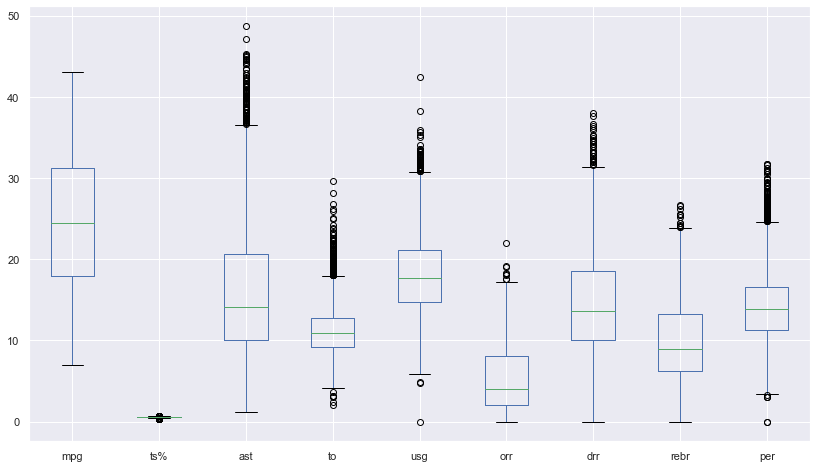

In [10]:
# check outliers with boxplots
per_data.boxplot(figsize = (14, 8))

Lots of outlying data. however, want to be careful removing outliers, as some are critical to defining an unknown PER relationship

Most outliers are on the high side

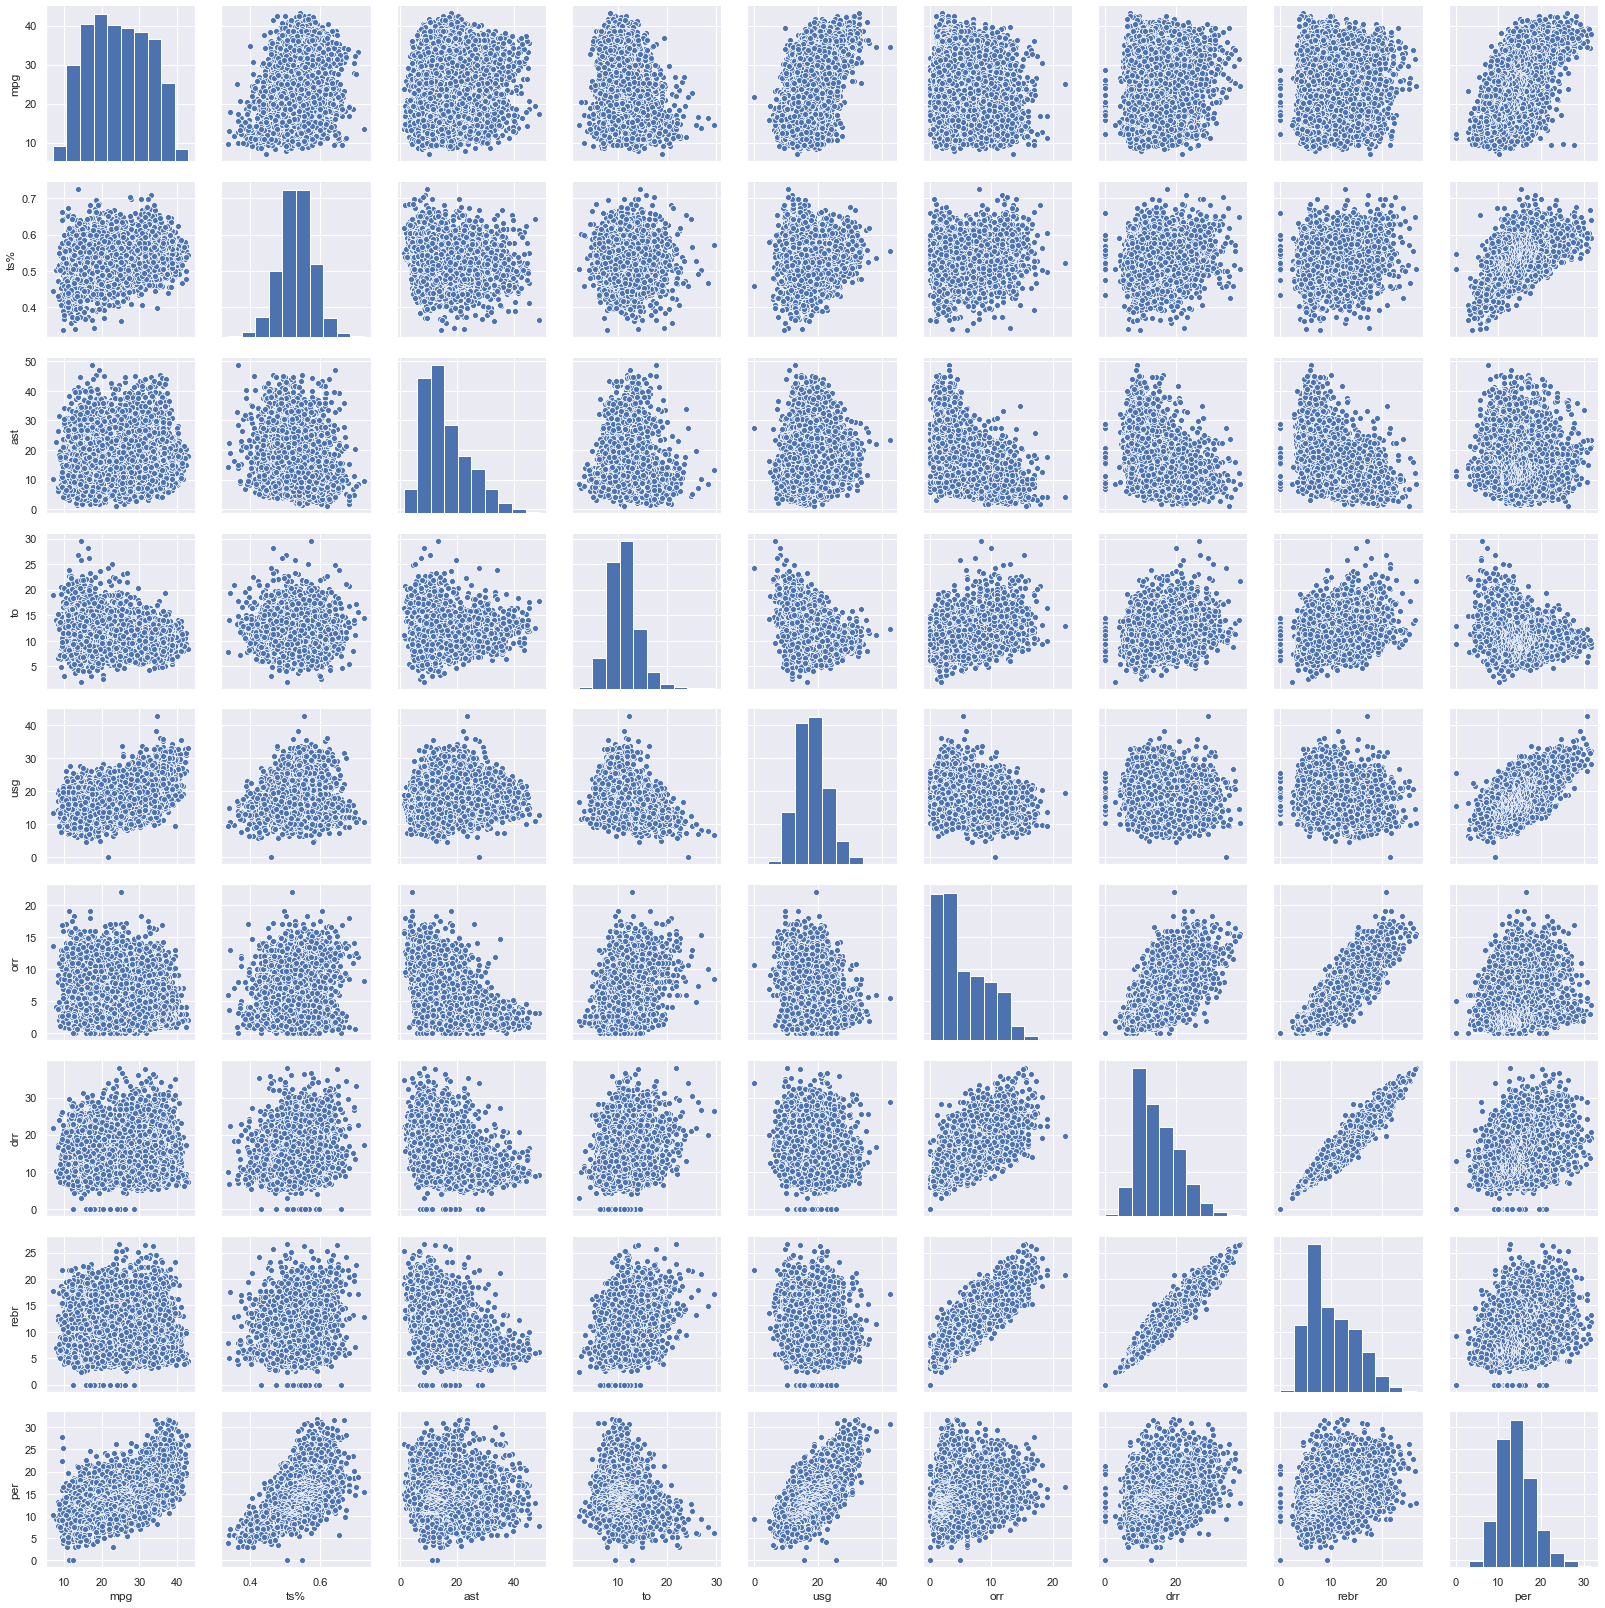

In [11]:
# choose a sns pairplot to see how each feature is realted to PER
sns.pairplot(per_data)

Looking at feature pairplots vs PER - they're pretty messy. Some look linear, others like they have a lot of noise and could possibly be polynomial. We know all have some bearing on the PER calculation

Will follow this up using a correlation matrix to check for statistical relationshio between each feature and PER

#### Correlation between PER and Features

The pairplot gave some useful information concerning the relationships between PER and the various other features - some appear linear, others perhaps best modeled as polynomials. 

We will generate mathematical correlations between the others

In [12]:
# get correlations across dataframe:
corr = per_data.corr()

# interested in how each correlates with per:
per_corr = corr[['per']]
per_corr

,per
mpg,0.595452
ts%,0.582373
ast,-0.038877
to,-0.207722
usg,0.659476
orr,0.214795
drr,0.338760
rebr,0.311737
per,1.000000


Text(0.5, 1.0, 'Correlation Heatmap - Advanced NBA Statistics vs PER')

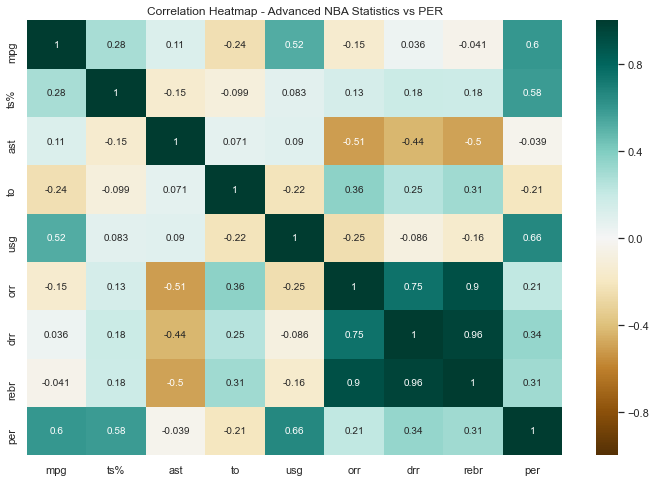

In [13]:
# generate heatmap of each feature correlation
plt.figure(figsize = (12, 8))
heatmap = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap - Advanced NBA Statistics vs PER')

Checking the heatmap, there are a number of high correlations between features - specifically between the rebounding rates. 

- will remove orr and drr from the X variable going forward and re-examine with just a single rebounding rate

In [14]:
X = X.drop(['drr', 'orr'], axis = 1)
X

,mpg,ts%,ast,to,usg,rebr
0,39.4,0.564,15.0,7.1,32.6,9.5
1,37.8,0.602,10.7,10.1,27.8,16.5
2,41.5,0.550,16.0,9.6,31.1,9.3
3,40.5,0.553,20.4,9.4,25.0,18.8
4,39.3,0.564,14.1,11.1,25.7,19.0
...,...,...,...,...,...,...
5399,14.2,0.417,8.4,11.0,9.1,9.1
5400,15.2,0.445,13.8,12.9,14.6,8.5
5401,10.9,0.439,11.5,15.0,16.2,7.4
5402,15.8,0.473,8.0,10.0,8.4,7.7


Now there are only 6 features to examine against PER

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:332: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


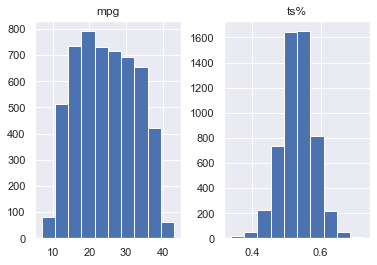

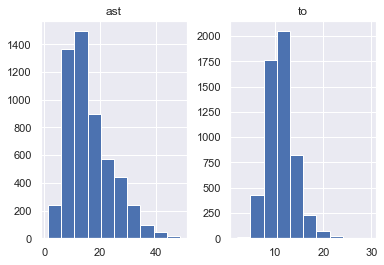

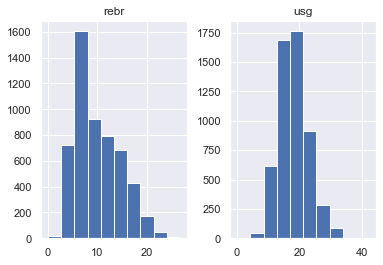

In [15]:
# re-examining histograms for the remaining features
mpgts = X.hist(column = ['mpg', 'ts%'])
astto = X.hist(column = ['ast', 'to'])
usgrebr = X.hist(column = ['usg', 'rebr'])

We find we've remove the 2 features that were most skewed

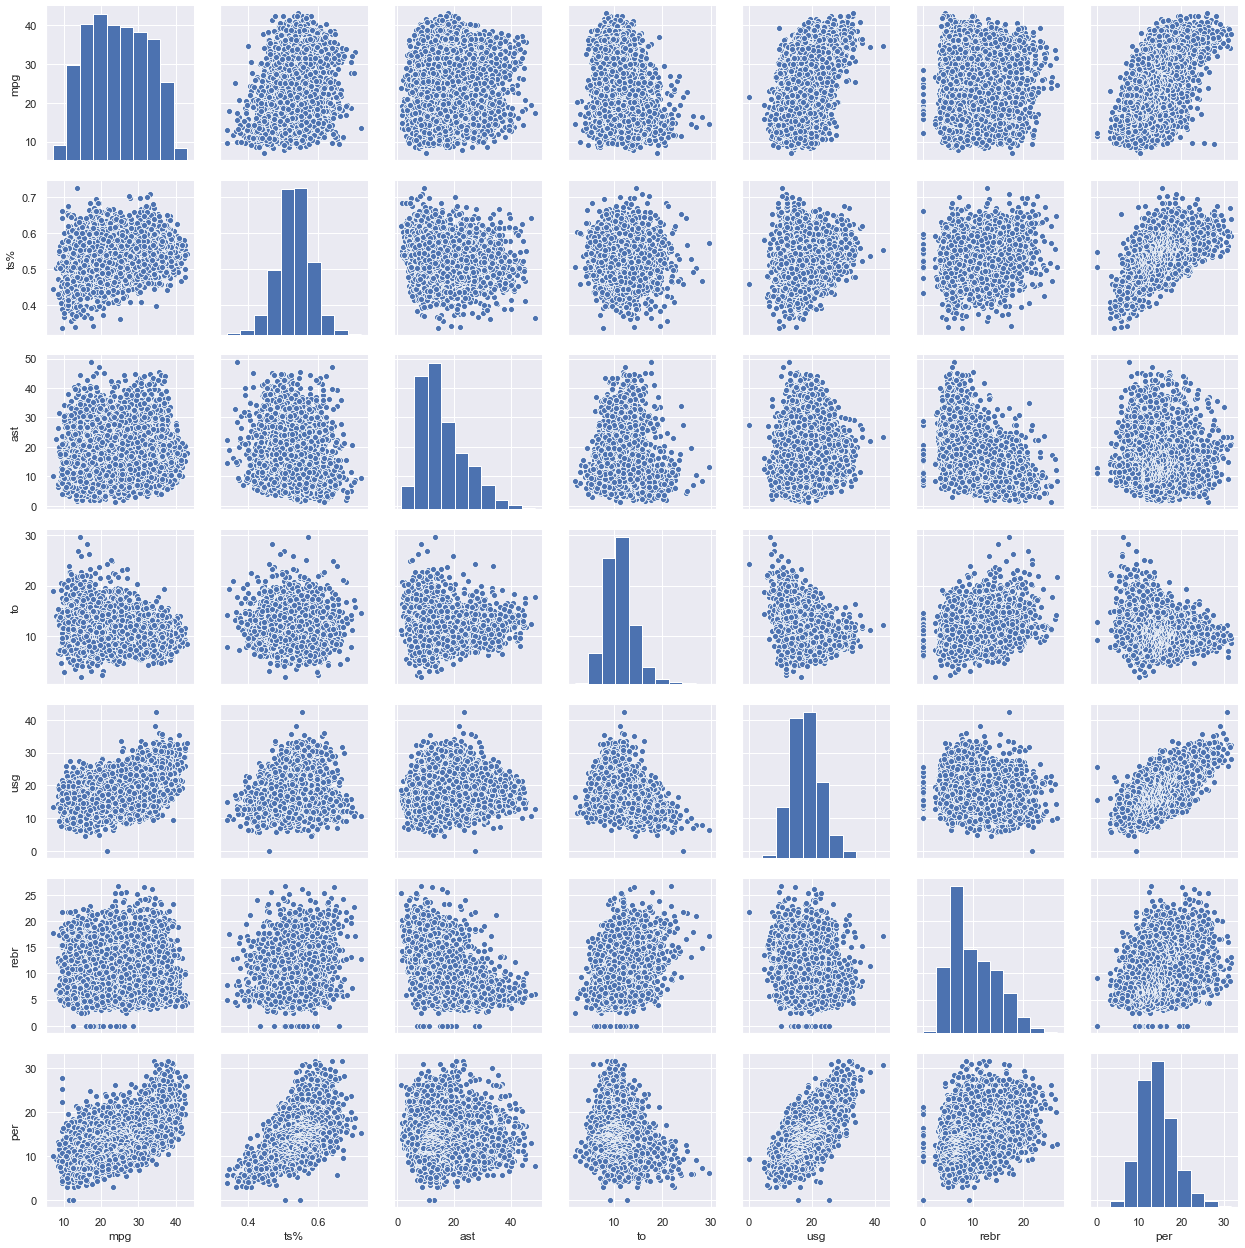

In [16]:
# re-examining the pairplot
final_per_data = per_data.drop(['orr', 'drr'], axis = 1)
sns.pairplot(final_per_data)

There are still some non-linearities in the relationships - becoming more clear that these resemble a polynomial feature - in some cases, with a lot of noise

Will now be important to determine which degree of polynomial fits the best

Re-checking correlations and heat map:

In [17]:
# get correlations across dataframe:
final_corr = final_per_data.corr()

# interested in how each correlates with per:
final_per_corr = corr[['per']]
final_per_corr

,per
mpg,0.595452
ts%,0.582373
ast,-0.038877
to,-0.207722
usg,0.659476
orr,0.214795
drr,0.338760
rebr,0.311737
per,1.000000


Text(0.5, 1.0, 'Correlation Heatmap - Advanced NBA Statistics vs PER')

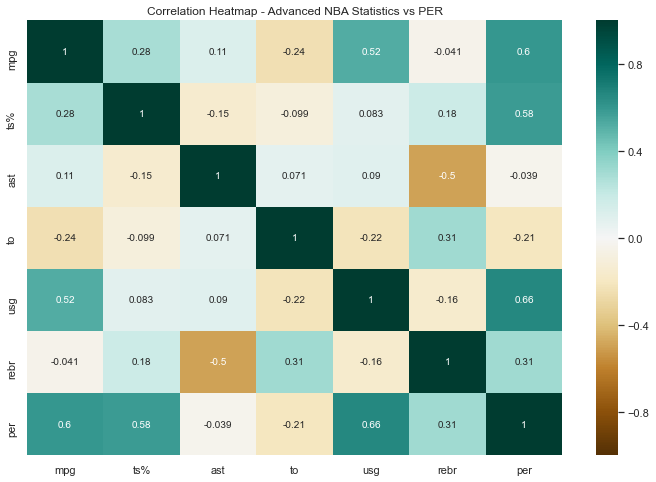

In [18]:
plt.figure(figsize = (12, 8))
final_heatmap = sns.heatmap(final_corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
final_heatmap.set_title('Correlation Heatmap - Advanced NBA Statistics vs PER')

### Regression Analysis

We will evaluate 3 different types of regression - a vanilla linear model & 2 regularized regression terms (Ridge and Lasso). Each will be run first as a linear model and compared to a polynomial model (order = 3)

#### Linear Regression

In [19]:
# model has 5404 rows, with 6 features
print('Feature Shape: ', X.shape)
print('Target Shape: ', y.shape)

Feature Shape:  (5404, 6)
Target Shape:  (5404,)


In [20]:
# split data into training and testing sets - choose a 70/30 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 72018)
print('X Train: ', X_train.shape)
print('y Train: ', y_train.shape)
print('X Test: ', X_test.shape)
print('y Test: ', y_test.shape)

X Train:  (3782, 6)
y Train:  (3782,)
X Test:  (1622, 6)
y Test:  (1622,)


In [21]:
# scale data using Standard Scaler
from sklearn.preprocessing import StandardScaler

# initiate instance of class
s = StandardScaler()

# transform trainnig data
X_train_s = s.fit_transform(X_train)

# check shaoe
print('Compare Shapes: ', X_train.shape, X_train_s.shape)

Compare Shapes:  (3782, 6) (3782, 6)


In [22]:
# Regressions
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

### Linear Regression:
# create instance of class
lr = LinearRegression()
# fit model to data
lr_model = lr.fit(X_train_s, y_train)
# transform the X_test values using the scaler object
X_test_s = s.transform(X_test)
# predict values from model
y_pred_lr = lr.predict(X_test_s)
# generate R2 Score
lr_score = r2_score(y_pred_lr, y_test)
lr_mse = mean_squared_error(y_pred_lr, y_test)
print('Linear Regression Results')
print('R2 Score: ', lr_score)
print('MSE: ', lr_mse)
print('-----------------------')

### Ridge Regression: test over various alpha values
# define parameter alpha range
alphas = np.geomspace(1e-9, 1, num = 10)
rr_scores = []
rr_errors = []
for a in alphas:
    # create instance of ridge model
    rr = Ridge(alpha = a)
    # fit the model
    rr_model = rr.fit(X_train_s, y_train)
    # predict on model
    y_pred_rr = rr.predict(X_test_s)
    # measure accuracy - R2 score and MSE
    rr_score = r2_score(y_pred_rr, y_test)
    rr_mse = mean_squared_error(y_pred_rr, y_test)
    rr_scores.append(rr_score)
    rr_errors.append(rr_mse)
# Note, for every value of alpha, the results are the same -> nothing to simplify using the Ridge Regression (the score is always .866 and MSE = 2.006)
print('Ridge Regression Results')
print('R2 Score: ',max(rr_scores))
print('MSE: ', min(rr_errors))
print('-----------------------')

### Lasso Regression
# use same parameter alpha range
las_scores = []
las_errors = []
for a in alphas:
    # create instance of class
    las = Lasso(alpha = a, max_iter = 50000)
    # fit the model
    las_model = las.fit(X_train_s, y_train)
    # predict on model
    y_pred_las = las.predict(X_test_s)
    # measure accuracy - R2 score and MSE
    las_score = r2_score(y_pred_las, y_test)
    las_mse = mean_squared_error(y_pred_las, y_test)
    las_scores.append(las_score)
    las_errors.append(las_mse)
# Create DataFrame
las_df = pd.DataFrame()
las_df['alpha'] = alphas
las_df['score'] = las_scores
las_df['mse'] = las_errors

# There is some change in score/error with Lasso, especially as alpha increases
# find row with max R2 Score
max_sc = las_df[las_df['score'] == las_df['score'].max()]
print('Lasso Regression Results')
print('Alpha: ', max_sc.loc[0]['alpha'])
print('R2 Score: ', max_sc.loc[0]['score'] )
print('MSE: ', max_sc.loc[0]['mse'])

Linear Regression Results
R2 Score:  0.8662424314565693
MSE:  2.0062382848547453
-----------------------
Ridge Regression Results
R2 Score:  0.8662424314564874
MSE:  2.0062382848550158
-----------------------
Lasso Regression Results
Alpha:  1e-09
R2 Score:  0.8662424312910039
MSE:  2.0062382853298337


##### Note that across all types of Regression (Linear, ridge, Lasso) there is no change in performance when using sclaed data with little-no complexity (ie: Polynomial Features). This is consistent with what we would expect from an uncomplicated (ie: 1st order) model 

##### Coefficients for each Model

In [23]:
features = X.columns.to_list()
lr_coefficients = lr.coef_
rr_coefficients = rr.coef_
las_coefficients = las.coef_
feature_df = pd.DataFrame()
feature_df['features'] = features
feature_df['Linear'] = lr_coefficients
feature_df['Ridge'] = rr_coefficients
feature_df['Lasso'] = las_coefficients

feature_df

,features,Linear,Ridge,Lasso
0,mpg,0.553614,0.554288,0.441714
1,ts%,1.796195,1.795744,1.136055
2,ast,0.925834,0.924889,0.000000
3,to,-0.748347,-0.747793,-0.000000
4,usg,2.473734,2.472791,1.583357
5,rebr,2.107803,2.106570,0.412945


Note that there is little-no difference between Linear and Ridge regression coefficients. This makes sense, as Ridge regression tends to lower complexity/feature coefficients but doesn't always tend to zero.

There is a difference between the Lasso coefficients and those of the other 2 regressions, although little-no difference in performance over most alpha ranges. It looks like the Lasso Regression is performing a rough feature selection - zeroing out ast (assist rate) and to (turnover rate) while adjusting the weights of other coefficients.

Next, we will do a full polynomial regression to evaluate

### Polynomial Regression

Looking at the above picture of how the various features interact with the target (PER), we will choose to use a 4th order polynomial, and allow regularization to 'whittle away' model complexity

In [24]:
# features already exist in their own df from cleaned data
# show head of features:
print('Shape of Features: ', X.shape)
X.head()

Shape of Features:  (5404, 6)


,mpg,ts%,ast,to,usg,rebr
0,39.4,0.564,15.0,7.1,32.6,9.5
1,37.8,0.602,10.7,10.1,27.8,16.5
2,41.5,0.550,16.0,9.6,31.1,9.3
3,40.5,0.553,20.4,9.4,25.0,18.8
4,39.3,0.564,14.1,11.1,25.7,19.0


In [25]:
# show head of targets
print('Shape of Targets: ', y.shape)
y.head()

Shape of Targets:  (5404,)


0    31.01
1    29.43
2    27.07
3    26.46
4    26.46
Name: per, dtype: float64

In [26]:
# we will transform data to a higher order polynomial (order = 3) prior to splitting and standardizing
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)
X_pf = pf.fit_transform(X)

# check the changes in shape of the feature dataframe
print('X Shape: ', X.shape)
print('X_pf Shape: ', X_pf.shape)

X Shape:  (5404, 6)
X_pf Shape:  (5404, 84)


In [27]:
# we will then perform a train/test split of the polynomial data, similar to what was done above for linear regression
X_pf_train, X_pf_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.3, random_state = 72018)
print('X_pf Train: ', X_pf_train.shape)
print('y Train: ', y_train.shape)
print('X_pf Test: ', X_pf_test.shape)
print('y Test: ', y_test.shape)

X_pf Train:  (3782, 84)
y Train:  (3782,)
X_pf Test:  (1622, 84)
y Test:  (1622,)


In [28]:
# we will then fit a Standard Scaler to the polynomial train data
s = StandardScaler()
X_train_pf_s = s.fit_transform(X_pf_train)

In [29]:
# Regressions
### Linear Regression
# create a new class instance
lr_poly = LinearRegression()
# fit model to data
lr_poly_model = lr_poly.fit(X_train_pf_s, y_train)
# standard scaler transform the X_test_pf values
X_test_pf_s = s.transform(X_pf_test)
# predict values from model
y_pred_lr_poly = lr_poly.predict(X_test_pf_s)
# generate R2 Score
lr_poly_score = r2_score(y_pred_lr_poly, y_test)
lr_poly_mse = mean_squared_error(y_pred_lr_poly, y_test)
print('Linear Regression Results - Polynomial Regression')
print('R2 Score: ', lr_poly_score)
print('MSE: ', lr_poly_mse)
print('-----------------------')

Linear Regression Results - Polynomial Regression
R2 Score:  0.9083500191788483
MSE:  1.4581850780209096
-----------------------


In [30]:
# As we see the polynomial Regression model does a little better job expalining the variance than vanilla linear regression
print('Linear Regression Score: ', lr_score, 'Linear Regression MSE: ', lr_mse)
print('Polynomial Regression Score: ', lr_poly_score, 'Polynomial Regression MSE: ', lr_poly_mse)

Linear Regression Score:  0.8662424314565693 Linear Regression MSE:  2.0062382848547453
Polynomial Regression Score:  0.9083500191788483 Polynomial Regression MSE:  1.4581850780209096


In [31]:
### Ridge Regression
# define parameter alpha range
poly_alphas = np.geomspace(1e-9, 1, num = 10)
rr_poly_scores = []
rr_poly_errors = []
for a in poly_alphas:
    # create instance of ridge model
    rr_poly = Ridge(alpha = a)
    # fit the model
    rr_poly_model = rr_poly.fit(X_train_pf_s, y_train)
    # predict on model
    y_pred_poly_rr = rr_poly.predict(X_test_pf_s)
    # measure accuracy - R2 score and MSE
    rr_poly_score = r2_score(y_pred_poly_rr, y_test)
    rr_poly_mse = mean_squared_error(y_pred_poly_rr, y_test)
    rr_poly_scores.append(rr_poly_score)
    rr_poly_errors.append(rr_poly_mse)
    
print('Ridge Regression Results')
print('R2 Score: ',max(rr_poly_scores))
print('MSE: ', min(rr_poly_errors))
print('-----------------------')

Ridge Regression Results
R2 Score:  0.9089007468279433
MSE:  1.449955432252772
-----------------------


In [32]:
# again, with Ridge, we see the polynomial features helped increase model performance
print('Linear Regression Score - Ridge: ', max(rr_scores), 'Linear Regression MSE - Ridge: ', min(rr_errors))
print('Polynomial Regression Score - Ridge: ', max(rr_poly_scores), 'Polynomial Regression MS - Ridge: ', min(rr_poly_errors))

Linear Regression Score - Ridge:  0.8662424314564874 Linear Regression MSE - Ridge:  2.0062382848550158
Polynomial Regression Score - Ridge:  0.9089007468279433 Polynomial Regression MS - Ridge:  1.449955432252772


In [33]:
### Lasso Regression
# use same parameter alpha range
las_poly_scores = []
las_poly_errors = []
for a in poly_alphas:
    # create instance of class
    las_poly = Lasso(alpha = a, max_iter = 100000, tol = 0.01)
    # fit the model
    las_poly_model = las_poly.fit(X_train_pf_s, y_train)
    # predict on model
    y_pred_poly_las = las_poly.predict(X_test_pf_s)
    # measure accuracy - R2 score and MSE
    las_poly_score = r2_score(y_pred_poly_las, y_test)
    las_poly_mse = mean_squared_error(y_pred_poly_las, y_test)
    las_poly_scores.append(las_poly_score)
    las_poly_errors.append(las_poly_mse)
# Create DataFrame
las_poly_df = pd.DataFrame()
las_poly_df['alpha'] = poly_alphas
las_poly_df['score'] = las_poly_scores
las_poly_df['mse'] = las_poly_errors

# There is some change in score/error with Lasso, especially as alpha increases
# find row with max R2 Score
max_poly_sc = las_poly_df[las_poly_df['score'] == las_poly_df['score'].max()]
print('Lasso Regression Results')
max_poly_sc
print('Alpha: ', max_poly_sc.loc[5]['alpha'])
print('R2 Score: ', max_poly_sc.loc[5]['score'] )
print('MSE: ', max_poly_sc.loc[5]['mse'])

C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2587.7689991431102, tolerance: 690.5004788558962
  positive)
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2586.662069823174, tolerance: 690.5004788558962
  positive)
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2575.5682354125456, tolerance: 690.5004788558962
  positive)
C:\Users\iaustin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: Conv

Lasso Regression Results
Alpha:  0.0001
R2 Score:  0.9088989281449705
MSE:  1.4493829120813084


In [34]:
# again, with Lasso, we see the polynomial features helped increase model performance
print('Linear Regression Score - Lasso: ', max_sc.loc[0]['score'], 'Linear Regression MSE - Lasso: ', max_sc.loc[0]['mse'])
print('Polynomial Regression Score - Lasso: ', max_poly_sc.loc[5]['score'], 'Polynomial Regression MS - Lasso: ', max_poly_sc.loc[5]['mse'])

Linear Regression Score - Lasso:  0.8662424312910039 Linear Regression MSE - Lasso:  2.0062382853298337
Polynomial Regression Score - Lasso:  0.9088989281449705 Polynomial Regression MS - Lasso:  1.4493829120813084


##### Note that across all types of Regression (Linear, ridge, Lasso) there still little change (0.9083 -  0.9089) in the model performance. This is likely due to the number of features (beginning features before polynomial transformation = 6) rendering the model relatively simple to begiun with

##### Model Coefficients

In [35]:
# get names of features after polynomial transformation
poly_features = pf.get_feature_names(input_features = X.columns)
lr_poly_coefficients = lr_poly.coef_
rr_poly_coefficients = rr_poly.coef_
las_poly_coefficients = las_poly.coef_
poly_feature_df = pd.DataFrame()
poly_feature_df['features'] = poly_features
poly_feature_df['Linear'] = lr_poly_coefficients
poly_feature_df['Ridge'] = rr_poly_coefficients
poly_feature_df['Lasso'] = las_poly_coefficients

poly_feature_df

,features,Linear,Ridge,Lasso
0,1,-4.324404e-12,0.000000,0.0
1,mpg,-1.217984e+00,0.242847,0.0
2,ts%,1.000527e+00,0.786844,0.0
3,ast,-2.261291e+00,-0.055560,0.0
4,to,-7.192361e+00,-0.544317,-0.0
...,...,...,...,...
79,to rebr^2,5.596993e-01,0.278693,0.0
80,usg^3,-2.217606e-01,-0.179772,0.0
81,usg^2 rebr,6.983887e-01,0.552174,0.0
82,usg rebr^2,-8.245586e-01,-0.224528,0.0


In [36]:
# check regularization
## check number of non zero rows in each regression
lr_non_zero = sum(poly_feature_df['Linear'].abs() > 0)
rr_non_zero = sum(poly_feature_df['Ridge'].abs() > 0)
las_non_zero = sum(poly_feature_df['Lasso'].abs() > 0)

print('Number of Features: ', len(poly_feature_df.index))
print('Number of Linear Regression Features: ', lr_non_zero)
print('Number of Ridge Regression Features: ', rr_non_zero)
print('Number of Lasso Regression Features: ', las_non_zero)

Number of Features:  84
Number of Linear Regression Features:  84
Number of Ridge Regression Features:  83
Number of Lasso Regression Features:  4


Based on the numbers of features, the Lasso Regression zeroed out many features, leaving only 4 non-zero features, each of which is a combination of other features:

In [37]:
df_las_features = poly_feature_df[poly_feature_df['Lasso'] != 0]
df_las_features = df_las_features.drop(['Linear', 'Ridge'], axis = 1)
df_las_features

,features,Lasso
38,mpg ts% rebr,0.432442
47,mpg usg rebr,0.453386
52,ts%^2 usg,2.135335
62,ts% usg rebr,0.154702


In summary, the best model for fitting the PER formula/relationship, blind with data, would be the vanilla linear regression. The reasons are as follows

- all of the models have pretty close performance (R2 values at 0.866 - 0.9089). The small bump doesn't justify the additional computation, as this isn't a safety sensitive prediction
- With acceptable performance, the vanilla linear regression offers the best explainability 
- difference in actual prediction error is quite small (1.4 per in vanilla linear vs 1.2 for polynomial regression)
Overall:
- using a 3rd order polynomial representation of the data, we can predict PER to approximately a 90% accuracy from a combination of 
    - minutes per game
    - true shooting %
    - assist rate
    - turnover rate
    - usage rate
    - rebounding rate
- The mean sqaured error of the prediction is ~1.44, meaning the absolute error of prediction is ~1.2 points of PER